### Plotting and Visualization

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

In [3]:
xr.set_options(display_style='html')

In [4]:
# Air temperature dataset from xarray
ds = xr.tutorial.open_dataset('air_temperature.nc').rename({'air': 'Tair'})

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
# Add a gradient field with appropriate attributes
ds['dTdx'] = ds.Tair.differentiate('lon') / 110e3 / np.cos(ds.lat * np.pi / 180) # temperature gradient along X
ds['dTdy'] = ds.Tair.differentiate('lat') / 105e3 # temperature gradient along Y
ds.dTdx.attrs = { 'long_name': '$dT/dx$ ', 'units': '*C/m'}
ds.dTdy.attrs = { 'long_name': '$dT/dy$ ', 'units': '*C/m'}

ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    dTdx     (time, lat, lon) float32 1.826e-05 1.616e-05 ... -1.882e-06
    dTdy     (time, lat, lon) float32 -9.905e-06 -7.619e-06 ... -1.905e-06
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

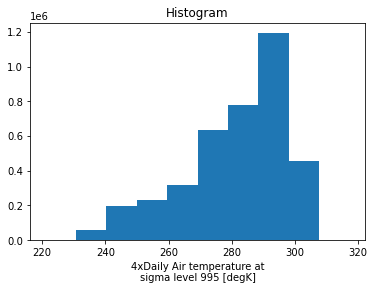

In [8]:
ds.Tair.plot()

(array([2.60000e+01, 1.07000e+02, 2.33000e+02, 5.80000e+02, 1.23600e+03,
        3.02400e+03, 5.79500e+03, 1.11750e+04, 1.70040e+04, 2.35390e+04,
        3.12020e+04, 3.46370e+04, 3.94140e+04, 4.28060e+04, 4.69670e+04,
        4.45250e+04, 4.52830e+04, 4.87420e+04, 4.72430e+04, 4.79700e+04,
        4.96050e+04, 5.56130e+04, 5.89220e+04, 6.70350e+04, 8.40440e+04,
        9.65140e+04, 1.20916e+05, 1.36870e+05, 1.42767e+05, 1.38881e+05,
        1.41293e+05, 1.47658e+05, 1.58557e+05, 1.60168e+05, 1.71131e+05,
        1.93524e+05, 2.06015e+05, 2.31082e+05, 2.57485e+05, 3.04130e+05,
        2.63295e+05, 1.47190e+05, 3.29710e+04, 6.70400e+03, 3.22100e+03,
        1.32100e+03, 4.37000e+02, 1.15000e+02, 2.50000e+01, 3.00000e+00]),
 array([221.     , 222.928  , 224.856  , 226.784  , 228.712  , 230.64   ,
        232.568  , 234.496  , 236.424  , 238.352  , 240.28   , 242.208  ,
        244.136  , 246.064  , 247.992  , 249.92   , 251.84799, 253.776  ,
        255.704  , 257.632  , 259.56   , 261.4

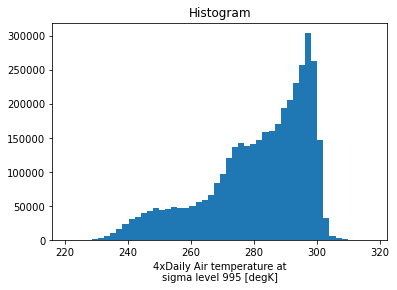

In [9]:
ds.Tair.plot(bins=50)

### 2D Plots

In [10]:
ds.Tair.isel(time=1)

<xarray.DataArray 'Tair' (lat: 25, lon: 53)>
array([[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999, 235.79999],
       [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    , 235.7    ],
       [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   , 238.5    ],
       ...,
       [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    , 294.79   ],
       [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    , 295.1    ],
       [296.29   , 297.19998, 297.4    , ..., 296.4    , 296.4    , 296.6    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

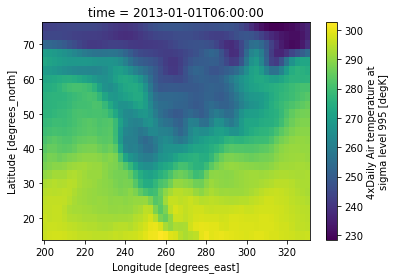

In [11]:
ds.Tair.isel(time=1).plot()

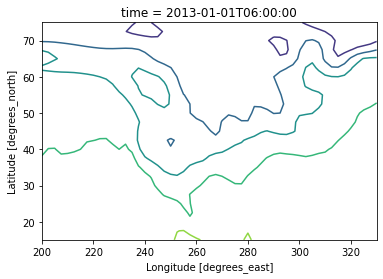

In [13]:
ds.Tair.isel(time=1).plot.contour()

Text(0, 0.5, 'new y')

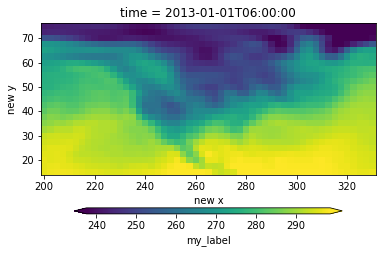

In [18]:
ds.Tair.isel(time=1).plot(
    robust=True,
    cbar_kwargs={ 'label': 'my_label', 'orientation': 'horizontal', 'aspect': 40, 'shrink': 0.8 }
)
ax = plt.gca()
ax.set_xlabel('new x')
ax.set_ylabel('new y')

### 1D line plots

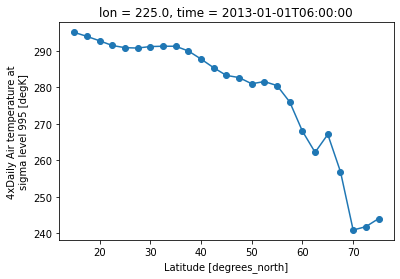

In [25]:
ds.Tair.isel(time=1, lon=10).plot(marker='o')

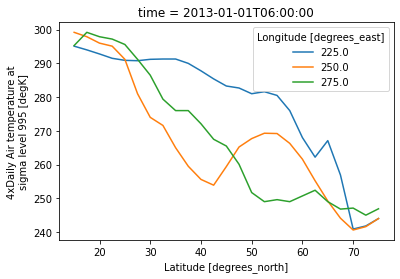

In [27]:
ds.Tair.isel(time=1, lon=[10, 20, 30]).plot(hue='lon')

In [28]:
monthly_means = ds.groupby('time.month').mean()
monthly_means.Tair.attrs = ds.Tair.attrs
monthly_means

<xarray.Dataset>
Dimensions:  (lat: 25, month: 12, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Tair     (month, lat, lon) float32 246.3 246.4 246.2 ... 297.6 297.6 297.5
    dTdx     (month, lat, lon) float32 5.082e-07 -9.469e-07 ... -1.043e-07
    dTdy     (month, lat, lon) float32 -9.553e-06 -9.605e-06 ... -3.872e-06

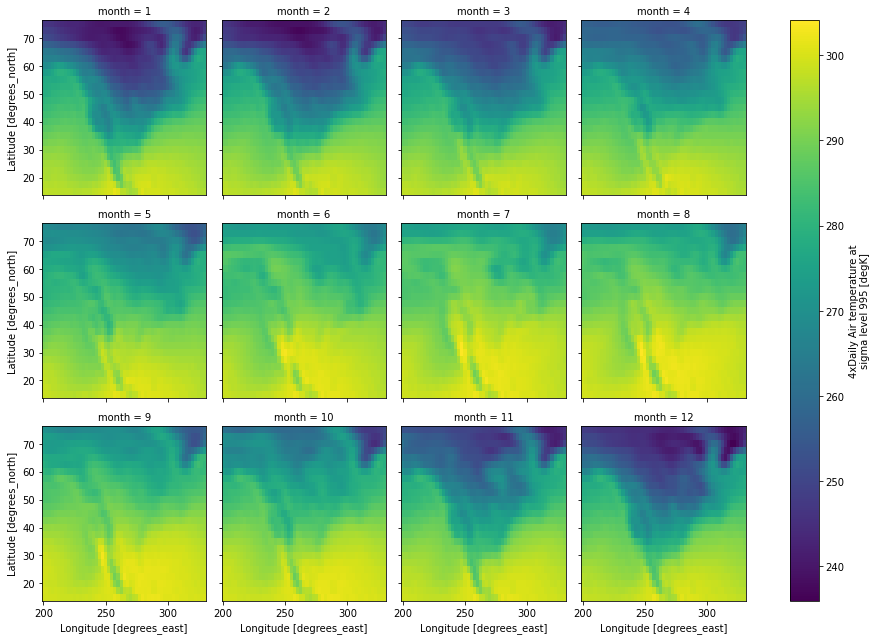

In [30]:
monthly_means.Tair.plot(col='month', col_wrap=4)

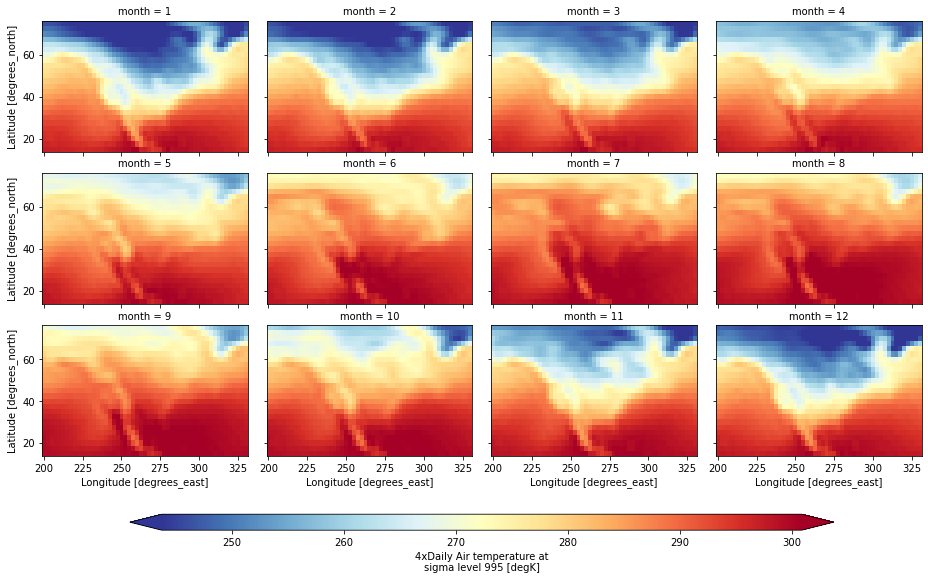

In [31]:
fg = monthly_means.Tair.plot(
    col='month',
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        'orientation': 'horizontal',
        'shrink': 0.8,
        'aspect': 40,
        'pad': 0.1,
    },
)

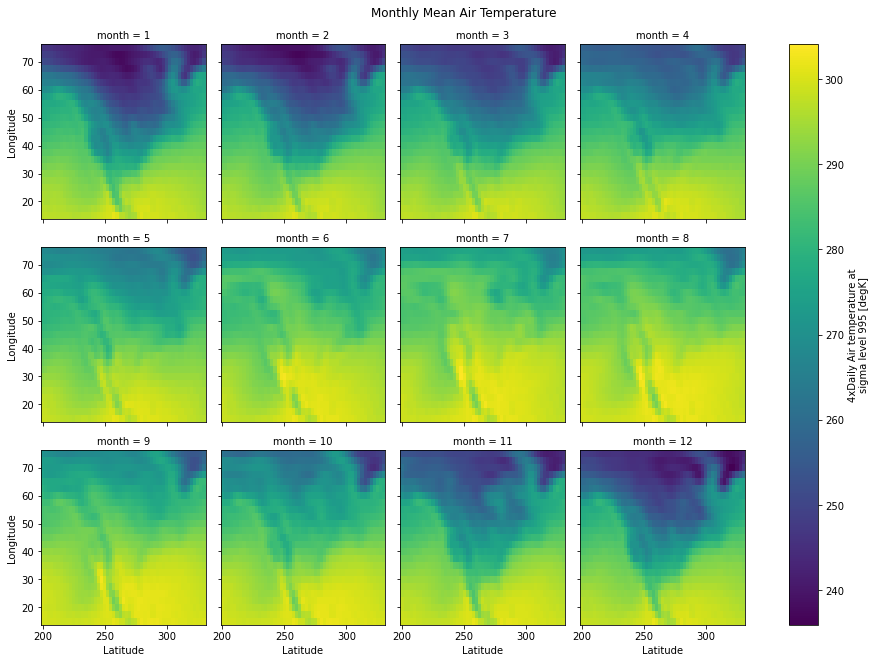

In [47]:
fig = monthly_means.Tair.plot(col='month', col_wrap=4)
fig.fig.suptitle('Monthly Mean Air Temperature', y=1.02)
fig.set_xlabels('Latitude')
fig.set_ylabels('Longitude')

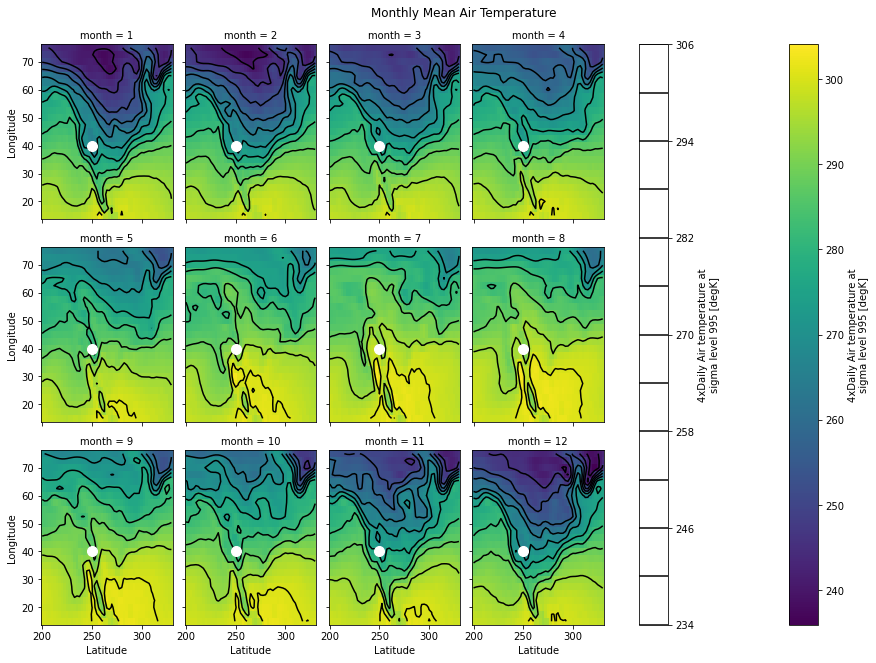

In [48]:
fig.map_dataarray(xr.plot.contour, x='lon', y='lat', colors='k', levels=13, add_colorbar=True)
# Example of how to add something on top of the plot (in this case, a white point)
fig.map(lambda: plt.plot(250, 40, markersize=20, marker='.', color='w'))

### Geography: Matplotlib and Cartopy

In [49]:
import cartopy.crs as ccrs

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Ortographic(-90, 30)))

ds.Tair.isel(time=1).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={ 'orientation': 'horizontal', 'shrink': 0.7 },
    robust=True
)
axis.coastlines() # cartopy function

ModuleNotFoundError: No module named 'cartopy'

In [52]:
# !pip3 install cartopy --no-binary :all:

In [53]:
import numpy as np